In [28]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [29]:
from wrangle import acquire_data, preprocessing

In [30]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
from descartes.patch import PolygonPatch

# Acquire

This data can be called using the url below

In [31]:
df = acquire_data()

### Can I use CASEID as an index?

In [32]:
print(len(df.CASEID) == len(df.CASEID.unique()))
print("Because the above code returns False, it means that there can be multiple entries for each `CASEID`")

False
Because the above code returns False, it means that there can be multiple entries for each `CASEID`


In [33]:
# What are the distribution of CASEID frequency
df.CASEID.value_counts().value_counts()

1    525836
2      7195
4        67
3        17
Name: CASEID, dtype: int64

### Initial dataframe exploration

In [34]:
df = preprocessing(df)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540545 entries, 0 to 540544
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   category              540545 non-null  object        
 1   caseid                540545 non-null  object        
 2   openeddatetime        540545 non-null  datetime64[ns]
 3   sla_date              529974 non-null  object        
 4   closeddatetime        497459 non-null  datetime64[ns]
 5   dept                  478090 non-null  object        
 6   reasonname            540545 non-null  object        
 7   typename              540545 non-null  object        
 8   sourceid              540545 non-null  object        
 9   objectdesc            540545 non-null  object        
 10  council_district      540545 non-null  object        
 11  xcoord                540545 non-null  object        
 12  ycoord                540545 non-null  object        
 13 

In [36]:
df.head(2)

,category,caseid,openeddatetime,sla_date,closeddatetime,dept,reasonname,typename,sourceid,objectdesc,council_district,xcoord,ycoord,report_starting_date,report_ending_date,is_late,is_closed
0,Streets & Infrastructure,1010126853,2011-12-10,12/11/2011,2020-03-05,Trans & Cap Improvements,Storm Water,Tree Fallen,Constituent Call,ELM CREEK and WURZBACH RD,8,2113584,13747492,2019-09-26,2019-09-26,True,True
1,Streets & Infrastructure,1010126880,2011-12-10,12/13/2011,2020-03-05,Trans & Cap Improvements,Streets,Barricade - Misc. Special Event/Emergency,Constituent Call,"1600 CENTENNIAL BV, San Antonio, 78211",5,2116553,13684805,2019-09-26,2019-09-26,True,True


In [37]:
street_map = gpd.read_file('GRID_City_Boundary.shp')

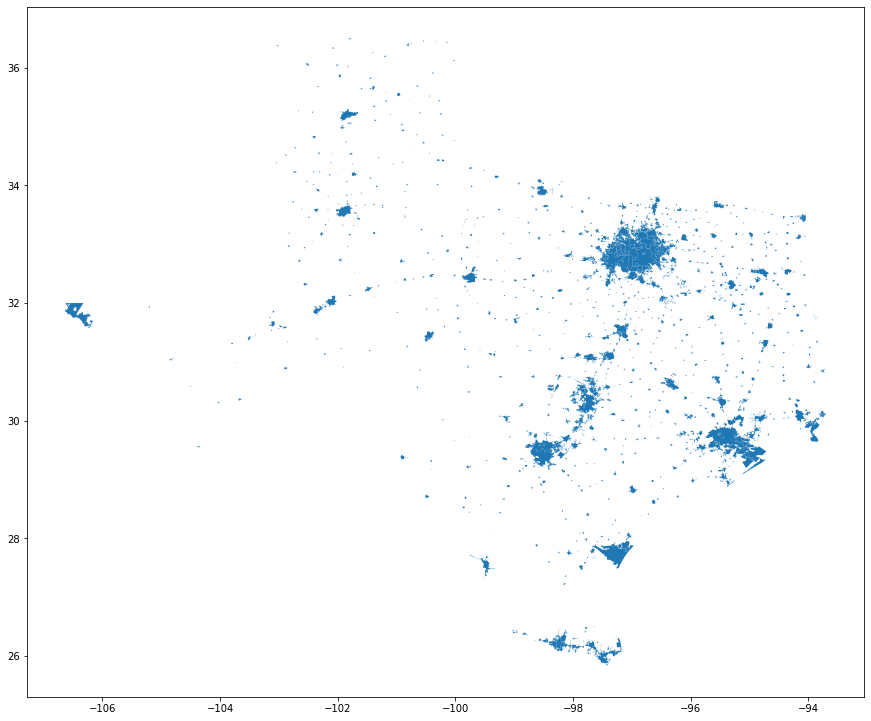

In [38]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax)

In [40]:
df.shape

(540545, 17)

In [42]:
df.category.value_counts()

No Category                  342059
Solid Waste Services          89914
Property Maintenance          50904
Animals                       22287
Streets & Infrastructure       9841
Traffic Signals and Signs      7926
Graffiti                       5561
Information                    4447
Scooters                       3603
Parks                          2898
Health & Sanitation            1096
Historic Preservation             9
Name: category, dtype: int64